# Шаг 4. Аналитика средствами Python

Есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

- Количество рейсов для каждого самолета в сентябре 2018 г.

/datasets/query_1.csv 

`model` — модели самолета

`flights_amount` — количество рейсов для каждой модели самолетов model в сентябре 2018 года

----

- Среднее количество рейсов, пребывающих в город за день в августе 2018 г.

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:

`city` — городах

`average_flights` — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

----
Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Прочитаем файлы. 
----

Прочитаем файл первого запроса и отсортируем по убыванию количества рейсов. Проверим на наличие пропущенных значений и посмотрим на типы заагруженных данных.

In [2]:
flights_by_model = pd.read_csv('/datasets/query_1.csv')
flights_by_model = flights_by_model.sort_values(by='flights_amount', ascending=False).reset_index(drop=True)
flights_by_model

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


In [3]:
flights_by_model['flights_amount'] = flights_by_model['flights_amount'].astype('int64')

In [4]:
flights_by_model.isna().sum()

model             0
flights_amount    0
dtype: int64

In [5]:
flights_by_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


----
Прочитаем файл второго запроса и отсортируем города в порядке убывания количества рейсов.

In [6]:
flights_by_city = pd.read_csv('/datasets/query_3.csv')
flights_by_city = flights_by_city.sort_values(by='average_flights', ascending=False).reset_index(drop=True)
flights_by_city.head()

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581


In [7]:
flights_by_city.isna().sum()

city               0
average_flights    0
dtype: int64

In [8]:
flights_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


----
**Вывод:**
- В файлах нет пропущенных значений. 
- В таблице `flights_by_model` поле `flights_amount` имеет тип `object`, чтобы работать с ним как с числовым полем, приведем его к типу `int64`.
- Для удобства отсортировали таблицы по числовым полям в порядке убывания.

### Выберем топ-10 городов по количеству рейсов.

In [9]:
top_10_cities = flights_by_city.head(10)
top_10_cities

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


----
### График модели самолетов и количество рейсов

Количество рейсов, выполняемых самолетами Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100 приблизительно одинаковое и более чем в 4 раза превышает количество рейсов, выполняемых самолетами Boeing и Airbus.

In [10]:
flights_by_model.sort_values(by='flights_amount', inplace=True)

In [11]:
model = flights_by_model['model']

In [12]:
flights_amount = flights_by_model['flights_amount']

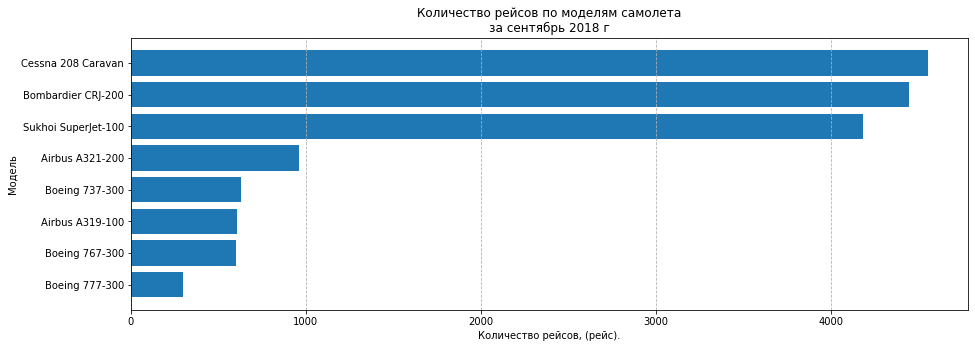

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set(title='Количество рейсов по моделям самолета\nза сентябрь 2018 г', xlabel='Количество рейсов, (рейс).', ylabel='Модель');
ax.barh(model, flights_amount)
ax.grid(axis='x', linestyle='--')

----
### График города и количество рейсов

Основная масса рейсов выполняется в Москву (в среднем ~130 рейсов/день), в Санкт-Петербург (в среднем ~30 рейсов/день), в Новосибирск (в среднем ~20 рейсов/день). 
В другие города выполняется менее 10 рейсов/день.

In [14]:
city = flights_by_city['city']

In [15]:
average_flights = flights_by_city['average_flights']

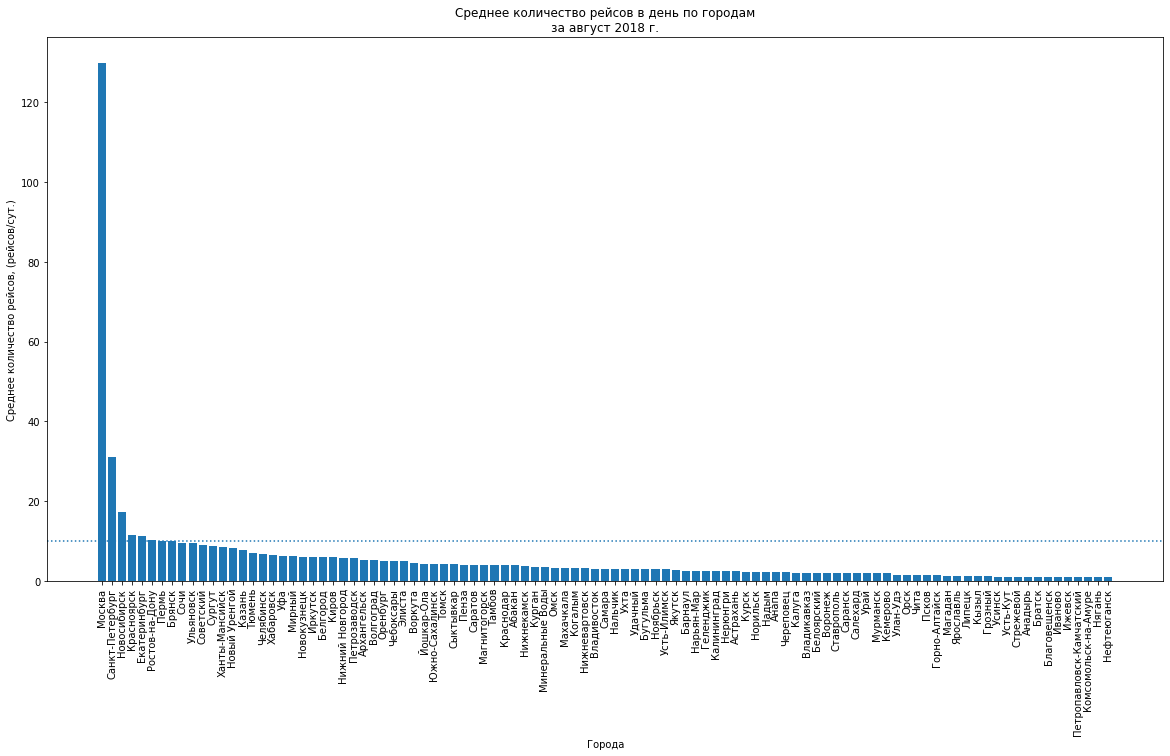

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(city, average_flights)
plt.xticks(rotation=90)
ax.axhline(10, linestyle=':')
ax.set(title='Среднее количество рейсов в день по городам\nза август 2018 г.', 
       xlabel='Города', ylabel='Среднее количество рейсов, (рейсов/сут.)');

----
### График топ-10 городов и количество рейсов

В десятке городов по количеству прибывающих рейсов выделяются Москва, Санкт-Петербург, Новосибирск.

In [17]:
top_city = top_10_cities['city']

In [18]:
top_average_flights = top_10_cities['average_flights']

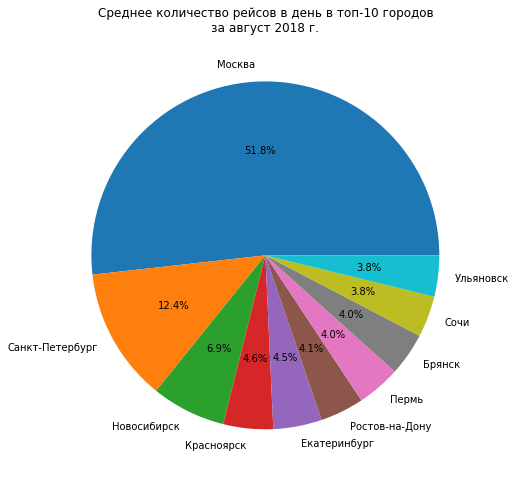

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_average_flights, labels=top_city, autopct='%1.1f%%')
ax.set(title='Среднее количество рейсов в день в топ-10 городов\nза август 2018 г.');

----
**Вывод:**
- Мы рассмотрели данные о количестве рейсов для каждой модели самолетов в сентябре 2018 года.
Наибольшее количество рейсов выполнено на моделях, предназначенных для коротких региональных перелетов, с малой вместимостью. 

1) Cessna 208 Caravan -  модель применяется для полетов дальностью менее 2 тыс.км., вместимость до 13 чел.

2) Bombardier CRJ-200 - модель применяется для полетов дальностью не более 3 тыс.км. Вместимость до 50 чел.

3) Sukhoi SuperJet-100 - модель применяется для ближнемагистральных полетов дальностью до 4 тыс.км. Вместимость до 108 чел.

Остальные места в списке занимают самолеты, которые применяются для длительных прелетов более 6 тыс.км., и с вместимостью более 150 человек.

- Мы рассмотрели данные о среднем количестве рейсов, выполняемых в города РФ в августе 2018 года.

Больше половины всех рейсов выполяется в Москву (52%).

В Санкт-Перетбург совершают в среднем 12% рейсов/день.

В Новосибирск летают около 7% всех рейсов.

Остальные города принимают по 5% и менее рейсов/сутки.


### **Чек-лист по заданиям**

Для этих двух наборов данных нужно:
- [x]  импортировать файлы;
- [x]  изучить данные в них;
- [x]  проверить типы данных на корректность;
- [x]  выбрать топ-10 городов по количеству рейсов;
- [x]  построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- [x]  сделать выводы по каждому из графиков, пояснить результат.